# Predecir con el dataset de [Kaggle](https://www.kaggle.com/jruvika/fake-news-detection) (true_or_fake)

Este notebook es la continuación de: `Processing_test_dataset.ipynb`

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
!pip install --upgrade pandas

    100% |████████████████████████████████| 10.1MB 3.5MB/s 
fastai 1.0.46 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


In [2]:
!ls "drive/My Drive/Colab Notebooks/data"

data_kaggle_proc.pickle		       news_proc_12_3_19.pickle
GoogleNews-vectors-negative300.bin.gz


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow import keras as k
from matplotlib import pyplot as plt


from gensim.models import KeyedVectors

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [0]:
data = pd.read_pickle('drive/My Drive/Colab Notebooks/data/data_kaggle_proc.pickle')
data = data.dropna()

In [3]:
data.head()

,Headline,Body,Label
0,"[2675, 1143, 2205, 48926, 6117, 13034, 0, 0, 0...","[15680, 8429, 28683, 14257, 312, 281, 565, 611...","[0, 0, 0, 1]"
1,"[556, 2168, 3912, 5042, 2360, 508, 115, 948, 0...","[4949, 20876, 17535, 3912, 46, 3610, 556, 3230...","[0, 0, 0, 1]"
2,"[13034, 12828, 316, 48926, 553, 16854, 23325, ...","[7, 14446, 1506, 69, 208, 995, 64, 116, 61, 60...","[0, 0, 0, 1]"
3,"[2905, 1469, 1930, 8, 44732, 2, 3538, 19568, 4...","[29922, 2905, 6585, 4840, 301, 11, 1080, 1428,...","[0, 0, 0, 1]"
4,"[2678, 3466, 8, 11440, 5739, 0, 0, 0, 0, 0, 0,...","[4868, 3076, 2678, 31, 10, 3246, 14, 11, 11440...","[0, 0, 0, 1]"


In [0]:
X_data = [np.asarray(data['Headline'].tolist()), 
             np.asarray(data['Body'].tolist())]

Y_data = np.array(data['Label'].tolist())

In [0]:
#model = KeyedVectors.load_word2vec_format("drive/My Drive/Colab Notebooks/data/GoogleNews-vectors-negative300.bin.gz", binary=True, limit=50000)

In [5]:
model = k.models.load_model('drive/My Drive/Colab Notebooks/weights/conv.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


### Predecir con los datos de entrada

In [0]:
prediction = model.predict(X_data)

In [0]:
pred_conversion = prediction.argmax(axis=1)
target_conversion = Y_data.argmax(axis=1)

In [0]:
pred_conversion

### Métricas de precisión

In [19]:
accuracy_score(pred_conversion, target_conversion)

0.5223618090452261

In [22]:
print(classification_report(pred_conversion, target_conversion))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       791
           1       0.00      0.00      0.00       210
           2       0.55      0.70      0.62      1666
           3       0.49      0.69      0.57      1313

   micro avg       0.52      0.52      0.52      3980
   macro avg       0.26      0.35      0.30      3980
weighted avg       0.39      0.52      0.45      3980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[   0    0  407  384]
 [   0    0  138   72]
 [   0    0 1167  499]
 [   0    0  401  912]]


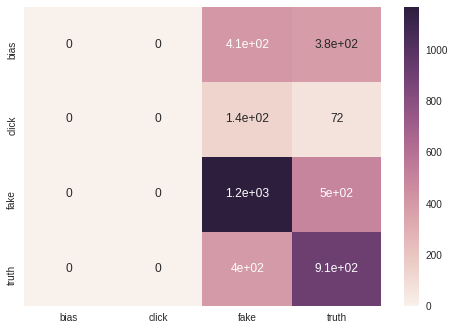

In [25]:
matrix = confusion_matrix(pred_conversion, target_conversion)
print(matrix)

#Plot
df_cm = pd.DataFrame(matrix, columns=['bias', 'click', 'fake', 'truth'], index=['bias', 'click', 'fake', 'truth'])
sns.heatmap(df_cm, annot=True)